In [6]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# configurations
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 15
colors = ["#003560", "#EF4700", "#EFB400", "#00B917", "#72009F"]

In [8]:
# load data
step4 = pd.read_csv("../survey_tool/data/results/full_study/step4.csv")
test_persons = pd.read_csv("../survey_tool/data/results/full_study/test_persons.csv")

# General Statistics

In [9]:
# Number of classified domains
len(step4)

16274

In [10]:
# How many domains were classified per participant?
step4["test_domain"].groupby(step4.user_id).count().describe()

count    287.000000
mean      56.703833
std       22.413612
min        1.000000
25%       41.000000
50%       57.000000
75%       69.000000
max      138.000000
Name: test_domain, dtype: float64

In [11]:
# How much time spent participants per domain?
step4["elapsed_time"].describe()

count    16274.000000
mean      2045.853201
std       1907.619793
min        336.000000
25%       1248.000000
50%       1647.000000
75%       2280.000000
max      66740.000000
Name: elapsed_time, dtype: float64

In [12]:
# Add columns:
# - correct_classification to determine whether the domain was classified correctly
# - mal_as_ben to determine whether a malicious domain was classified as benign
# - ben_as_mal to determine whether a benign domain was classified as malicious
step4 = step4.assign(correct_classification=False)
step4.loc[step4["classification"] == step4["result"], "correct_classification"] = True
step4 = step4.assign(mal_as_ben=False)
step4.loc[(step4["classification"] == 1) &
          (step4["classification"] != step4["result"]), "mal_as_ben"] = True
step4 = step4.assign(ben_as_mal=False)
step4.loc[(step4["classification"] == 0) &
          (step4["classification"] != step4["result"]), "ben_as_mal"] = True

In [13]:
# How many domains were classified correctly?
step4["correct_classification"].value_counts()

True     12608
False     3666
Name: correct_classification, dtype: int64

In [14]:
# How many domains were classified correctly (in %)?
step4["correct_classification"].value_counts() / len(step4)

True     0.774733
False    0.225267
Name: correct_classification, dtype: float64

In [15]:
# Precision
len(step4[(step4["classification"] == 1) & (step4["result"] == 1)]) / len(step4[step4["result"] == 1])

0.8559372098911301

In [16]:
# How many malicious domains were classified as benign?
step4[step4["mal_as_ben"] == True]["user_id"].count()

1959

In [17]:
# How many malicious domains were classified as benign (in % from all wrongly classified domains)?
step4[step4["mal_as_ben"] == True]["user_id"].count() /\
len(step4[step4["correct_classification"] == False])

0.5343698854337152

In [18]:
# How many benign domains were classified as malicious?
step4[step4["ben_as_mal"] == True]["user_id"].count()

1707

In [19]:
# How many benign domains were classified as malicious (in % from all wrongly classified domains)?
step4[step4["ben_as_mal"] == True]["user_id"].count() /\
len(step4[step4["correct_classification"] == False])

0.4656301145662848

In [20]:
step4[step4["mal_as_ben"] == True]["test_domain"].value_counts()

www.docusigner.org                                           26
docusignfolder.com                                           25
login-microsoft-us.com                                       24
security-paypal.com                                          24
americanexpress-secure.com                                   23
                                                             ..
yahoo.update.azadari.co.uk                                    2
1https.connect.secure.wellsfargo.com.tropfsteinhoehle.com     2
document-share-docusign-mess.classicalschoolathome.com        2
instagram.rezaee.ir                                           2
id.orange.fr.piggyhawk.net                                    2
Name: test_domain, Length: 225, dtype: int64

In [21]:
step4[step4["ben_as_mal"] == True]["test_domain"].value_counts()

sso.dhl-usa.com        52
mydhl.express.dhl      47
instagramers.com       46
boutique.orange.fr     45
docusign.utexas.edu    42
                       ..
wellsfargo.com          4
paypal.com              3
yahoo.com               3
facebook.com            3
orange.com              3
Name: test_domain, Length: 78, dtype: int64

# Statistics per User

In [22]:
# Create dataframe with statistics per user
statistics_per_user = {}
for index, row in step4.iterrows():
    user_id = row["user_id"]
    if user_id not in statistics_per_user:
        test_person = test_persons[test_persons.user_id==user_id]
        statistics_per_user[user_id] = {"domain_count": 0, "correct_classifications": 0,\
                                        "ben_classifications": 0, "mal_classifications": 0,\
                                        "ben_as_mal": 0, "mal_as_ben": 0,\
                                        "correct_ratio": 0.0,\
                                        "ben_ratio": 0.0, "mal_ratio": 0.0,\
                                        "mal_as_ben_ratio": 0.0, "ben_as_mal_ratio": 0.0,\
                                        "gender": test_person.gender.values[0],\
                                        "origin": test_person.origin.values[0],\
                                        "age": test_person.age.values[0],\
                                        "phishing": test_person.phishing.values[0]}
    statistics_per_user[user_id]["domain_count"] += 1
    if row["correct_classification"] == True:
        statistics_per_user[user_id]["correct_classifications"] += 1
    elif row["mal_as_ben"] == True:
        statistics_per_user[user_id]["mal_as_ben"] += 1
    elif row["ben_as_mal"] == True:
        statistics_per_user[user_id]["ben_as_mal"] += 1
    if row["result"] == 0:
        statistics_per_user[user_id]["ben_classifications"] += 1
    elif row["result"] == 1:
        statistics_per_user[user_id]["mal_classifications"] += 1
        
for user_id in statistics_per_user.keys():
    statistics_per_user[user_id]["correct_ratio"] = statistics_per_user[user_id]["correct_classifications"] /\
                                                    statistics_per_user[user_id]["domain_count"]
    statistics_per_user[user_id]["ben_ratio"] = statistics_per_user[user_id]["ben_classifications"] /\
                                                statistics_per_user[user_id]["domain_count"]
    statistics_per_user[user_id]["mal_ratio"] = statistics_per_user[user_id]["mal_classifications"] /\
                                                statistics_per_user[user_id]["domain_count"]
    wrong_classifications = statistics_per_user[user_id]["mal_as_ben"] + statistics_per_user[user_id]["ben_as_mal"]
    if wrong_classifications > 0:
        statistics_per_user[user_id]["mal_as_ben_ratio"] = statistics_per_user[user_id]["mal_as_ben"] / wrong_classifications
        statistics_per_user[user_id]["ben_as_mal_ratio"] = statistics_per_user[user_id]["ben_as_mal"] / wrong_classifications
statistics_per_user = pd.DataFrame.from_dict(statistics_per_user, orient="index")

## All users

AxesSubplot(0.125,0.125;0.775x0.755)


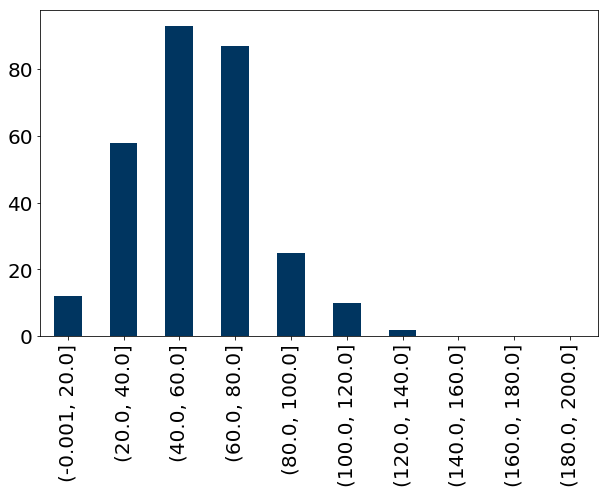

In [23]:
# How many domains were classified per participant
domain_count_bins = pd.cut(statistics_per_user.domain_count, bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200], include_lowest=True)
print(domain_count_bins.value_counts().sort_index().plot(kind="bar", color=colors[0], legend=False))

AxesSubplot(0.125,0.125;0.775x0.755)


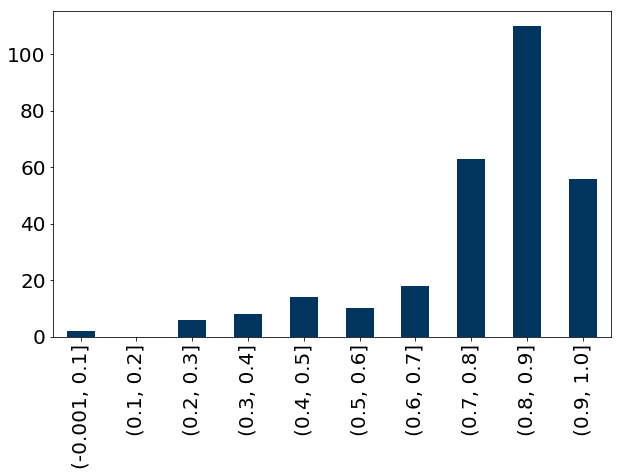

In [24]:
# How well were the domains classified per participant
correct_ratio_bins = pd.cut(statistics_per_user.correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
print(correct_ratio_bins.value_counts().sort_index().plot(kind="bar", color=colors[0], legend=False))

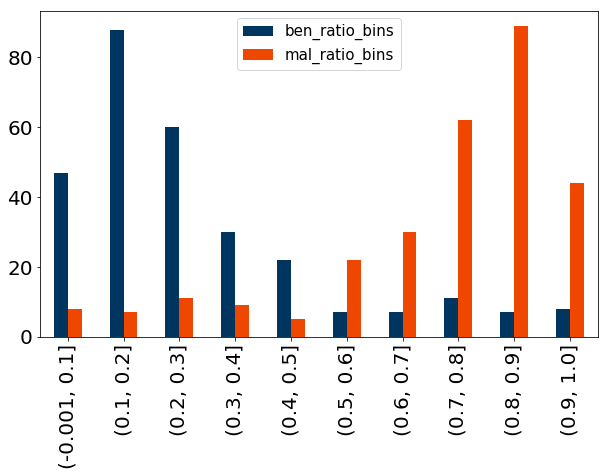

In [25]:
# How is the distribution of benign and malicious classifications among participants, i.e., are there participants who
# classify all domains as benign or malicious?
ben_ratio_bins = pd.cut(statistics_per_user.ben_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
mal_ratio_bins = pd.cut(statistics_per_user.mal_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
pd.DataFrame({"ben_ratio_bins": ben_ratio_bins.value_counts().sort_index(),\
              "mal_ratio_bins": mal_ratio_bins.value_counts().sort_index()}).plot(kind="bar", color=colors)

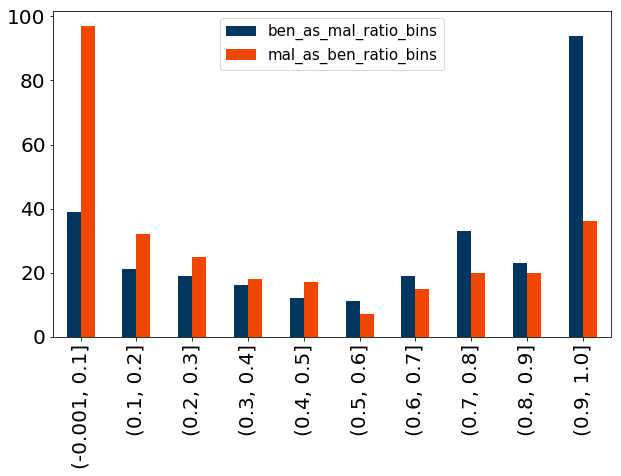

In [26]:
# How is the distribution of the benign as malicious ratio?
ben_as_mal_ratio_bins = pd.cut(statistics_per_user.ben_as_mal_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
mal_as_ben_ratio_bins = pd.cut(statistics_per_user.mal_as_ben_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
pd.DataFrame({"ben_as_mal_ratio_bins": ben_as_mal_ratio_bins.value_counts().sort_index(),\
              "mal_as_ben_ratio_bins": mal_as_ben_ratio_bins.value_counts().sort_index()}).plot(kind="bar", color=colors)

## Based on Phishing Experience

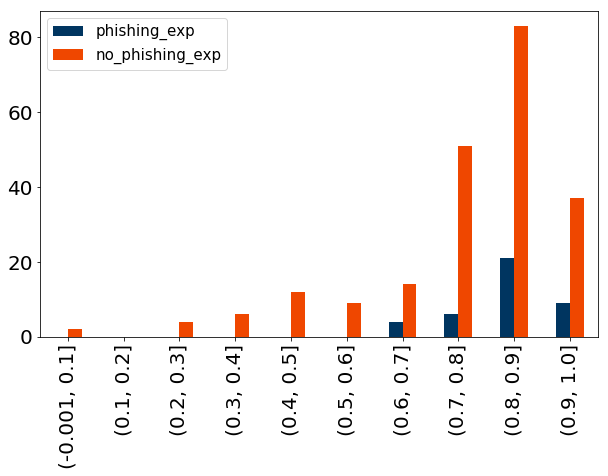

In [27]:
yes_bins = pd.cut(statistics_per_user[statistics_per_user.phishing=="yes"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
no_bins = pd.cut(statistics_per_user[statistics_per_user.phishing=="no"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
pd.DataFrame({"phishing_exp": yes_bins.value_counts().sort_index(),\
              "no_phishing_exp": no_bins.value_counts().sort_index()}).plot(kind="bar", color=colors)

## Based on Gender

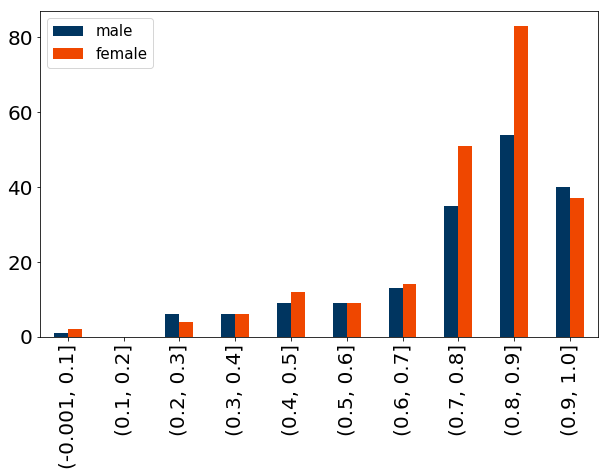

In [28]:
male_bins = pd.cut(statistics_per_user[statistics_per_user.gender=="male"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
female_bins = pd.cut(statistics_per_user[statistics_per_user.gender=="female"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
pd.DataFrame({"male": male_bins.value_counts().sort_index(),\
              "female": no_bins.value_counts().sort_index()}).plot(kind="bar", color=colors)

## Based on Origin

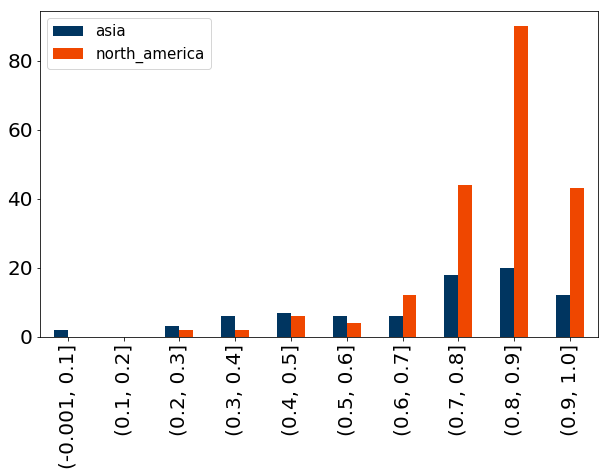

In [29]:
asia_bins = pd.cut(statistics_per_user[statistics_per_user.origin=="asia"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
north_america_bins = pd.cut(statistics_per_user[statistics_per_user.origin=="north_america"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
pd.DataFrame({"asia": asia_bins.value_counts().sort_index(),\
              "north_america": north_america_bins.value_counts().sort_index()}).plot(kind="bar", color=colors)

In [30]:
pd.DataFrame({"asia": asia_bins.value_counts().sort_index(),\
              "north_america": north_america_bins.value_counts().sort_index()})

,asia,north_america
"(-0.001, 0.1]",2,0
"(0.1, 0.2]",0,0
"(0.2, 0.3]",3,2
"(0.3, 0.4]",6,2
"(0.4, 0.5]",7,6
"(0.5, 0.6]",6,4
"(0.6, 0.7]",6,12
"(0.7, 0.8]",18,44
"(0.8, 0.9]",20,90
"(0.9, 1.0]",12,43


## Based on Age group

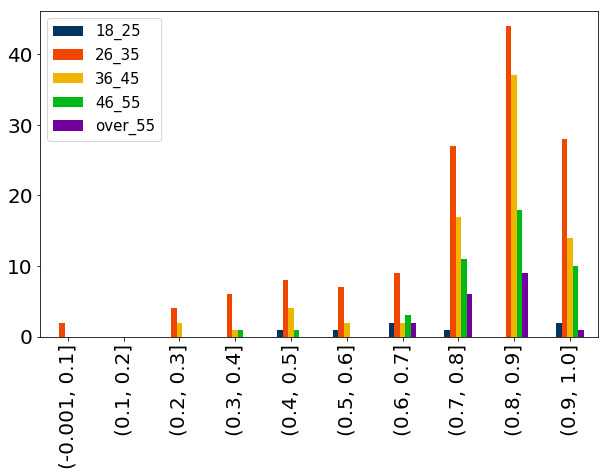

In [31]:
bins_18_25 = pd.cut(statistics_per_user[statistics_per_user.age=="18_25"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
bins_26_35 = pd.cut(statistics_per_user[statistics_per_user.age=="26_35"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
bins_36_45 = pd.cut(statistics_per_user[statistics_per_user.age=="36_45"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
bins_46_55 = pd.cut(statistics_per_user[statistics_per_user.age=="46_55"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
bins_over_55 = pd.cut(statistics_per_user[statistics_per_user.age=="over_55"].correct_ratio, bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)
pd.DataFrame({"18_25": bins_18_25.value_counts().sort_index(),\
              "26_35": bins_26_35.value_counts().sort_index(),\
              "36_45": bins_36_45.value_counts().sort_index(),\
              "46_55": bins_46_55.value_counts().sort_index(),\
              "over_55": bins_over_55.value_counts().sort_index()}).plot(kind="bar", color=colors)

In [32]:
import scipy as sp
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

dataFrame = pd.DataFrame(data=statistics_per_user);

#print("DataFrame:");
#print(dataFrame);

correlation    = dataFrame.corr(method="pearson");

print("Pearson correlation coefficient:");
print(correlation);

calculate_pvalues(dataFrame)

 

Pearson correlation coefficient:
                         domain_count  correct_classifications  \
domain_count                 1.000000                 0.824984   
correct_classifications      0.824984                 1.000000   
ben_classifications          0.408036                -0.094971   
mal_classifications          0.747049                 0.930566   
ben_as_mal                   0.609373                 0.568307   
mal_as_ben                   0.308509                -0.250209   
correct_ratio               -0.012341                 0.478332   
ben_ratio                   -0.123966                -0.523825   
mal_ratio                    0.123966                 0.523825   
mal_as_ben_ratio            -0.115039                -0.443083   
ben_as_mal_ratio             0.157317                 0.478754   

                         ben_classifications  mal_classifications  ben_as_mal  \
domain_count                        0.408036             0.747049    0.609373   
correct_clas

,domain_count,correct_classifications,ben_classifications,mal_classifications,ben_as_mal,mal_as_ben,correct_ratio,ben_ratio,mal_ratio,mal_as_ben_ratio,ben_as_mal_ratio
domain_count,0,0,0,0,0,0,0.8351,0.0358,0.0358,0.0516,0.0076
correct_classifications,0,0,0.1084,0,0,0,0,0,0,0,0
ben_classifications,0,0.1084,0,0,0.0004,0,0,0,0,0,0
mal_classifications,0,0,0,0,0,0,0,0,0,0,0
ben_as_mal,0,0,0.0004,0,0,0.0034,0.4574,0,0,0,0
mal_as_ben,0,0,0,0,0.0034,0,0,0,0,0,0
correct_ratio,0.8351,0,0,0,0.4574,0,0,0,0,0,0
ben_ratio,0.0358,0,0,0,0,0,0,0,0,0,0
mal_ratio,0.0358,0,0,0,0,0,0,0,0,0,0
mal_as_ben_ratio,0.0516,0,0,0,0,0,0,0,0,0,0


In [39]:
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chisq_of_df_cols(dataFrame, 'gender', 'phishing')

(7.212540745766128,
 0.3016381734596055,
 6,
 array([[8.20348432e+01, 1.31407666e+02, 3.79790941e+00, 7.59581882e-01],
        [1.09128920e+01, 1.74808362e+01, 5.05226481e-01, 1.01045296e-01],
        [1.50522648e+01, 2.41114983e+01, 6.96864111e-01, 1.39372822e-01]]))